In [1]:
# 匯入必要的套件
import pandas as pd
import matplotlib.pyplot as plt
# 在 Jupyter Notebook 中顯示 matplotlib 圖片
%matplotlib inline
# 載入cufflinks並設定離線模式
import cufflinks as cf
cf.go_offline()

In [2]:
plt.rcParams['font.family']  # 顯示matplotlib預設的字型   

['sans-serif']

## 列出matplotlib可用的字型
<font color=red>註：</font>需知道欲使用中文字型的英文名稱(<font color=blue>一般檔名內有-B5代表有Big5編碼，即支援中文字型</font>)

In [3]:
from matplotlib.font_manager import fontManager
[f.name for f in fontManager.ttflist]

['STIXSizeOneSym',
 'cmb10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmss10',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Serif',
 'cmsy10',
 'cmmi10',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'cmex10',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'DejaVu Sans',
 'Perpetua',
 'Odessa LET',
 'DFHeiUBold-B5',
 'MS Mincho',
 'DECODE',
 'Constantia',
 'Castellar',
 'Calibri',
 'DFYuanUBold-B5',
 'Papyrus',
 'Microsoft Yi Baiti',
 'Perpetua',
 'Times New Roman',
 'UD Digi Kyokasho N-R',
 'DFYeaSong-B5',
 'Microsoft Tai Le',
 'Calibri',
 'Franklin Gothic Heavy',
 'Bodoni MT',
 'Old English Text MT',
 'Ca

## 修改matplotlib預設字型
* <font color=red>plt.rcParams['font.family']</font>  

 <font color=blue>**適用matplotlib、pandas、seaborn等**</font>

In [4]:
plt.rcParams['font.family'] = ['SimHei']    # 步驟一（替換sans-serif字型為SimHei字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
plt.rcParams["figure.figsize"] = (12,6)     #設定圖形的大小，這裡設定的是寬 12 英寸，高 6 英寸
plt.rcParams['font.size'] = 14              #用來設定字體大小，這裡設定的是 14 磅

In [5]:
# data=pd.read_csv('00690.csv',encoding='big5')
# data.set_index(pd.to_datetime(data['Date'],format='%Y/%m/%d'),inplace=True)
# data.drop('Date',axis=1,inplace=True)
data= pd.read_csv('00690.csv',encoding='big5',parse_dates=['Date'],index_col=0).dropna()
data.head()    #印出前五筆資料

,Price
Date,
2017-03-31,19.91
2017-04-05,19.95
2017-04-06,19.93
2017-04-07,19.84
2017-04-10,19.80


# Moving Average
## $$MA=\frac{P_t+P_{t-1}+P_{t-2}+...+P_{t-(n-1)}}{n}$$
<img src="https://enjoyfreedomlife.com/wp-content/uploads/2022/07/SMA%E8%A8%88%E7%AE%97%E5%85%AC%E5%BC%8F-1024x577.jpg" alt="移動平均示例圖片" width="600"/>

In [6]:
df=data.copy()     # 將原始資料複製一份，避免修改原始資料
temp_df = df[['Price']]    # 取出 Price 欄位的資料
# 創建平移 i 天的欄位，i 從 1 到 4
for i in range(1,5):
    temp_df[f'平移{i}天'] = df['Price'].shift(i)
temp_df.head(10)    # 顯示前 10 筆資料

,Price,平移1天,平移2天,平移3天,平移4天
Date,,,,,
2017-03-31,19.91,NaN,NaN,NaN,NaN
2017-04-05,19.95,19.91,NaN,NaN,NaN
2017-04-06,19.93,19.95,19.91,NaN,NaN
2017-04-07,19.84,19.93,19.95,19.91,NaN
2017-04-10,19.80,19.84,19.93,19.95,19.91
2017-04-11,19.75,19.80,19.84,19.93,19.95
2017-04-12,19.72,19.75,19.80,19.84,19.93
2017-04-13,19.74,19.72,19.75,19.80,19.84
2017-04-14,19.70,19.74,19.72,19.75,19.80


In [7]:
temp_df['五日均線'] = temp_df.mean(axis=1, skipna=False)
temp_df.head(10)

,Price,平移1天,平移2天,平移3天,平移4天,五日均線
Date,,,,,,
2017-03-31,19.91,NaN,NaN,NaN,NaN,NaN
2017-04-05,19.95,19.91,NaN,NaN,NaN,NaN
2017-04-06,19.93,19.95,19.91,NaN,NaN,NaN
2017-04-07,19.84,19.93,19.95,19.91,NaN,NaN
2017-04-10,19.80,19.84,19.93,19.95,19.91,19.886
2017-04-11,19.75,19.80,19.84,19.93,19.95,19.854
2017-04-12,19.72,19.75,19.80,19.84,19.93,19.808
2017-04-13,19.74,19.72,19.75,19.80,19.84,19.770
2017-04-14,19.70,19.74,19.72,19.75,19.80,19.742


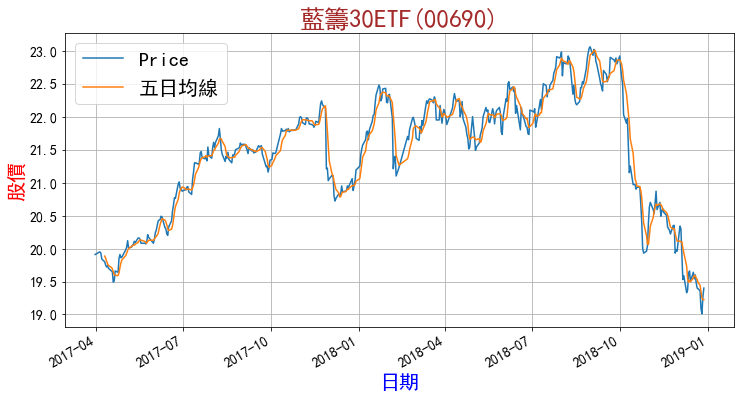

In [8]:
temp_df.loc['2017':'2018',['Price','五日均線']].plot(grid=True,figsize=(12,6))  # 畫出 2017 到 2018 年的股價和 五日均線
plt.title('藍籌30ETF(00690)',color='brown', fontsize=25)  # 設定圖表標題、字體顏色和大小
plt.xlabel('日期', fontsize=20, color='blue')  # 設定 X 軸標籤名稱、字體大小和顏色
plt.ylabel('股價', size=20, color='red')  # 設定 Y 軸標籤名稱、字體大小和顏色
plt.legend(fontsize=20)  # 設定圖例的字體大小
plt.show()  # 顯示圖表

In [9]:
fig = temp_df.loc['2017':'2018',['Price','五日均線']].iplot(asFigure=True,title='藍籌30ETF(00690)',
                                                  xTitle='日期',yTitle='股價',theme='ggplot')
fig.update_layout(hovermode='x unified',
                  legend=dict(x=0.01, y=0.95, bgcolor='white', bordercolor='blue', borderwidth=2))

In [10]:
df=data.copy()    #將原始的 data 複製一份，存入 df 中，以免直接對原始資料進行更動

#使用 rolling() 方法計算移動平均，設定窗口寬度為 5 天，並使用 mean() 方法計算平均值
MA_5=df.rolling(window=5).mean().rename(columns={'Price': '5MA'})    
# MA_20=df.rolling(window=20).mean()

MA_5.dropna(inplace=True)    #由於這個過程會產生 NaN 值，因此需要使用 dropna() 方法刪除這些值
MA_5.head(10)    # 顯示前 10 筆資料

,5MA
Date,
2017-04-10,19.886
2017-04-11,19.854
2017-04-12,19.808
2017-04-13,19.770
2017-04-14,19.742
2017-04-17,19.714
2017-04-18,19.694
2017-04-19,19.648
2017-04-20,19.602


In [11]:
def MA(price,days):
    ma=price.rolling(window=days).mean().rename(columns={'Price': f'{days}MA'})
    ma.dropna(inplace=True)
    return ma

In [12]:
MA(df,10)

,10MA
Date,
2017-04-17,19.800
2017-04-18,19.774
2017-04-19,19.728
2017-04-20,19.686
2017-04-21,19.668
...,...
2020-09-08,25.259
2020-09-09,25.205
2020-09-10,25.175


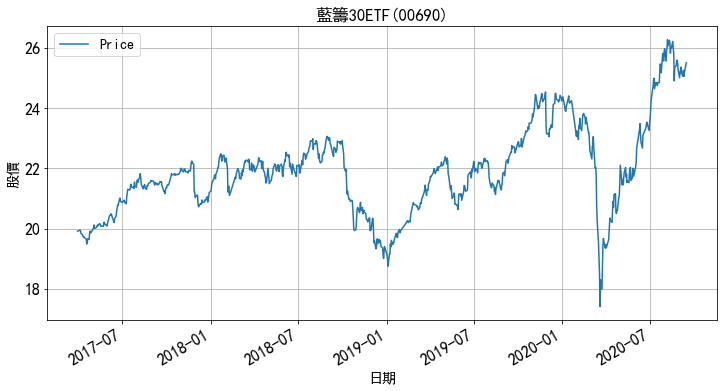

In [13]:
df.plot(title='藍籌30ETF(00690)',ylabel='股價', xlabel='日期', grid=True, fontsize=16);

In [14]:
fig = MA_5.iplot(asFigure=True,title='藍籌30ETF(00690)',legend=True,xTitle='日期',yTitle='股價')
fig.update_layout(width=800, height=400)

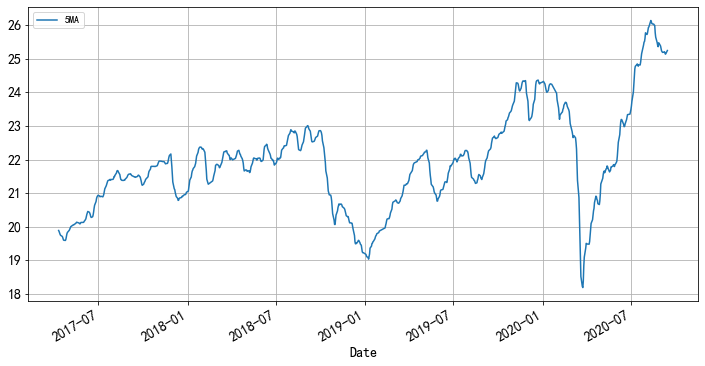

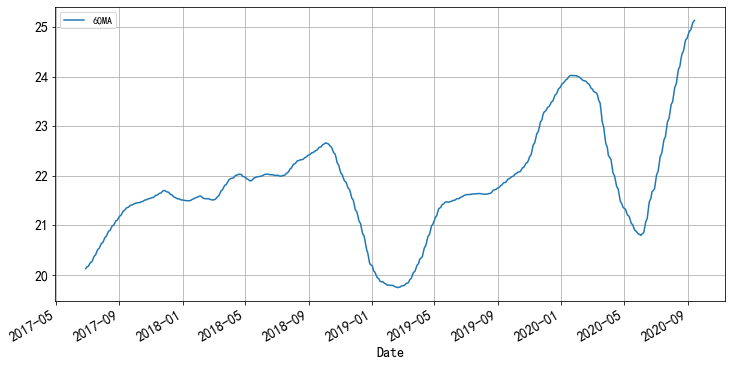

In [15]:
"""
Matplotlib 中，plt.legend() 函數用於添加圖例。
圖例是一個顯示每個數據序列的標籤和顏色的小框框，可以幫助讀者更好地理解圖形中的數據。
"""
MA(df,5).plot(grid=True)
plt.legend(['5MA'],fontsize=10)
MA(df,60).plot(grid=True)
plt.legend(['60MA'],fontsize=10)

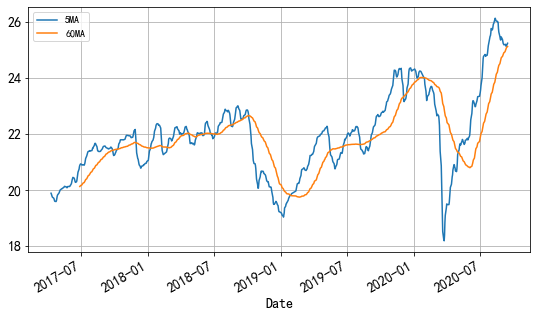

In [16]:
ax=plt.gca()  
"""
在 Matplotlib 中，plt.gca() 是獲取當前 Axes（軸）物件的函數。
Axes 物件代表了一個包含數據、座標軸、標籤和其他元素的圖形區域。
gca 是 "get current axes" 的縮寫，它返回當前圖形中的 Axes 物件，如果不存在則創建一個新的。
"""
MA(df,5).plot(grid=True,ax=ax,figsize=(9,5))    # 設定圖形大小
MA(df,60).plot(grid=True,ax=ax)
plt.legend(['5MA','60MA'],fontsize=10)
plt.show()

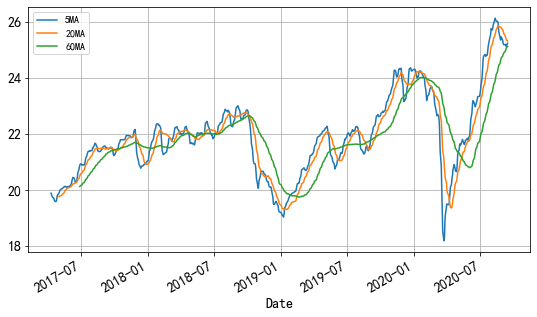

In [17]:
# 畫出移動平均線圖
ax = MA(df, 5).plot(figsize=(9, 5))  # 設定圖形大小，並畫出5MA，並把返回的Axes物件賦值給ax
MA(df, 20).plot(ax=ax, grid=True)  # 在ax上畫出20MA，設定網格線為True
MA(df, 60).plot(ax=ax, grid=True)  # 在ax上畫出60MA，設定網格線為True
plt.legend(['5MA', '20MA', '60MA'], fontsize=10)  # 設定圖例標籤為5MA, 20MA, 60MA，字型大小為10

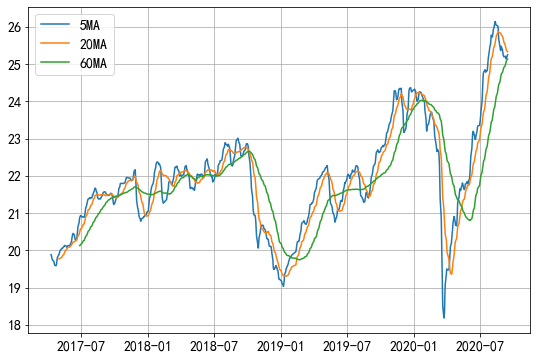

In [18]:
plt.figure(figsize=(9,6))   # 設定圖形大小
plt.plot(MA(df,5),label='5MA')   # 繪製 5MA 線並加上圖例標籤
plt.plot(MA(df,20),label='20MA')  # 繪製 20MA 線並加上圖例標籤
plt.plot(MA(df,60),label='60MA')  # 繪製 60MA 線並加上圖例標籤
plt.legend()   # 顯示圖例
plt.grid()   # 加上網格線

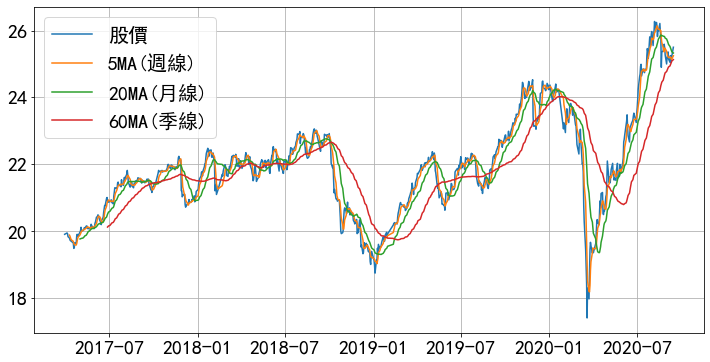

In [19]:
plt.figure(figsize=(12,6))      # 設定圖形大小
plt.plot(df['Price'])           # 繪製股價圖
plt.plot(MA(df,5))             # 繪製5週移動平均線
plt.plot(MA(df,20))            # 繪製20週移動平均線
plt.plot(MA(df,60))            # 繪製60週移動平均線
plt.xticks(fontsize=20)        # 設定X刻度標籤字型大小
plt.yticks(fontsize=20)        # 設定Y刻度標籤字型大小
plt.legend(['股價','5MA(週線)','20MA(月線)','60MA(季線)'],fontsize=20)  # 設定圖例
plt.grid()                      # 顯示網格線

In [20]:
 """
 計算股價的最高價格移動平均
 Args:(price: 一維的 pandas Series股價序列，days: 整數型別的移動平均天數)
 Returns:
  - ma: 計算得到的移動平均值，一維的 pandas Series 
 """
def MAXX(price,days):
    ma=price.rolling(days).max()    # 使用 rolling 方法計算最高價格移動平均
    ma.dropna(inplace=True)    # 移除計算得到的序列中的缺失值
    return ma

In [21]:
MAXX(df,20)

,Price
Date,
2017-05-02,19.98
2017-05-03,20.02
2017-05-04,20.12
2017-05-05,20.12
2017-05-08,20.12
...,...
2020-09-08,26.21
2020-09-09,26.21
2020-09-10,26.21


In [22]:
def MA_2(df,days):
    for i in range(len(days)):
        df[f'{days[i]}日均線']=df['Price'].rolling(window=days[i], min_periods=1).mean()
#         df.dropna(inplace=True)
    return df

In [23]:
days=[5,20,60,120]  #建立計算均線的日數
df_2=data.copy()    #將原始的 data 複製一份，存入 df_2 中，以免直接對原始資料進行更動
df_2=MA_2(df_2,days)
df_2

,Price,5日均線,20日均線,60日均線,120日均線
Date,,,,,
2017-03-31,19.91,19.9100,19.9100,19.910000,19.910000
2017-04-05,19.95,19.9300,19.9300,19.930000,19.930000
2017-04-06,19.93,19.9300,19.9300,19.930000,19.930000
2017-04-07,19.84,19.9075,19.9075,19.907500,19.907500
2017-04-10,19.80,19.8860,19.8860,19.886000,19.886000
...,...,...,...,...,...
2020-09-08,25.25,25.2100,25.4795,24.981167,23.026167
2020-09-09,25.05,25.1720,25.4410,25.020833,23.081167
2020-09-10,25.18,25.1360,25.3995,25.055500,23.145917


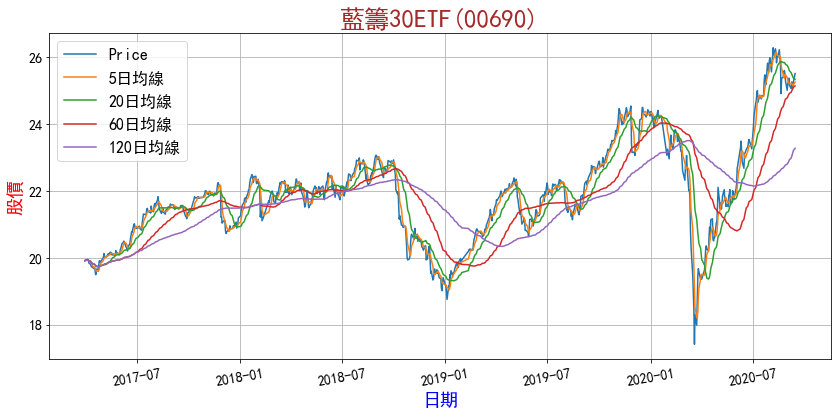

In [24]:
plt.figure(figsize=(14,6))      # 設定圖形大小
label=df_2.columns     # 將欄位名稱存入label的串列
plt.plot(df_2, label=label)     # 建立圖例標籤
plt.xticks(fontsize=14,rotation=10 )     #設定X刻度標籤字型大小,並旋轉刻度10度角
plt.yticks(fontsize=14 )     #設定Y刻度標籤字型大小
plt.legend(fontsize=16)     # 設定圖例字型大小
plt.title('藍籌30ETF(00690)',color='brown', fontsize=25)  # 設定圖表標題、字體顏色和大小
plt.xlabel('日期', fontsize=18, color='blue')    # 設定 X 軸標籤名稱、字型大小和顏色
plt.ylabel('股價', size=18, color='red')    # 設定 Y 軸標籤名稱、字型大小和顏色
# plt.legend(['股價','5MA(週線)','20MA(月線)','60MA(季線)'],fontsize=16)
plt.grid()    # 設定網格

In [25]:
fig = df_2.iplot(asFigure=True, title='藍籌30ETF(00690)', legend=True)
fig.update_layout(hovermode='x unified',width=900, height=400,legend=dict(x=0, y=1))
fig.show()